In [ ]:
from IPython import display

*Unpublished results are used in this notebook*

# **S**tructure **T**ensor **A**nalysis

- Structure Tensor Analysis (STA) is a method used to analyze spatial structures and patterns within medical images of e.g. mice brains. It works by computing the gradients of an image to determine the orientation and strength of edges or features present. This analysis involves calculating the structure tensor, which is a matrix that encodes information about the local structure of an image.
- MIRACL's STA workflow has been developed for fiber quantification and tracking (tracts created with MIRACL, image created with MRTrix):

In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1-JPOlBz4LpMLjiJ8uT63Z61EYueRiJ2c/preview" width="700" height="400" allow="autoplay"></iframe>

# MIRACL's STA functionality

MIRACL includes a multitude of STA methods:

```
track_tensor        Perform Structure Tensor Analysis (STA) on CLARITY viral tracing or stains
conn_graph          Generate connectivity graph
tract_density       Generate tract density map
tract_endpoints     Generate tract endpoints map
```

MIRACL also includes an STA workflow that covers the complete pipeline for fiber quantification and tracking:

1. The workflow converts a stack of TIFF images into a downsampled nifti file.
2. It then uses registered labels to create a seed mask at the depth (ontology level) of the desired label (seed) and as well as a brain mask.
3. It then runs the actual STA analysis, using the seed and brain masks created in the previous steps.
4. The workflow also computes virus intensities for all labels at their respective depth.

# Usage example: MIRACL's STA workflow

## GUI

From the main GUI (invoked with: `$ miraclGUI`), select `Workflows -> CLARITY STA`:

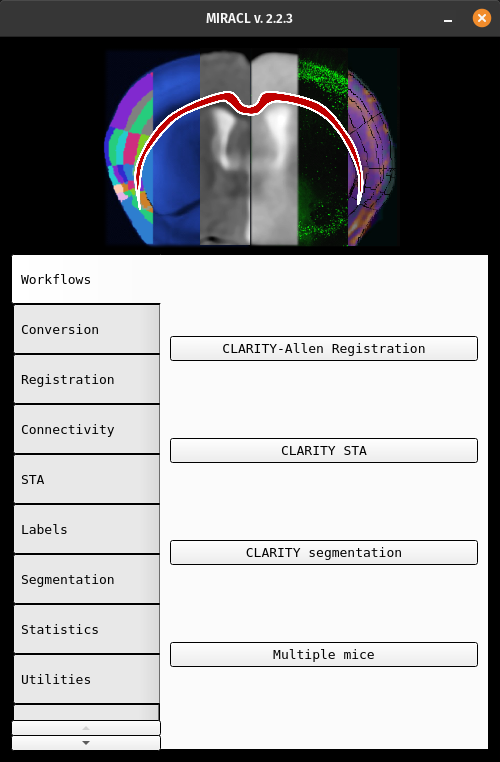

In [ ]:
display.Image("https://miracl.readthedocs.io/en/latest/_images/MIRACL_main-menu.png")

The following window will appear:

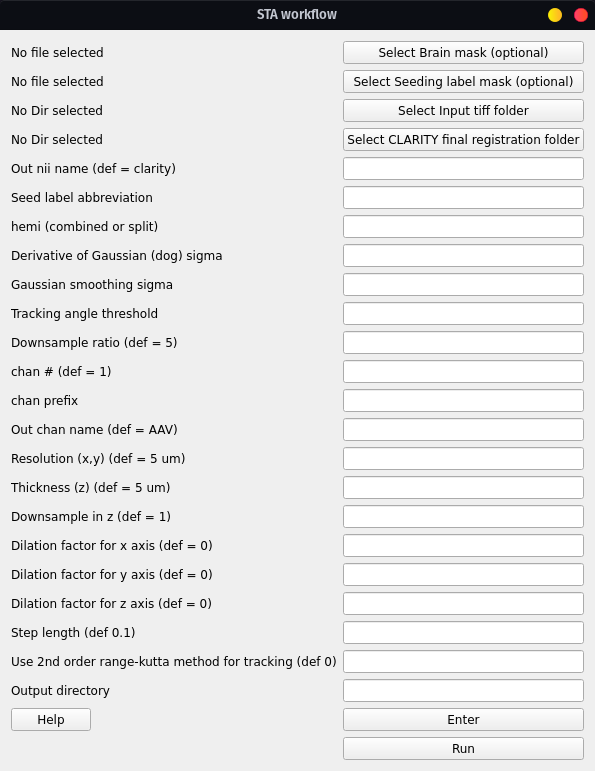

In [ ]:
display.Image("https://miracl.readthedocs.io/en/latest/_images/MIRACL_sta_menu.png")

Click on `Select Input tiff folder` and choose the folder that contains the virus channel from the dialog window.

Then choose the registered Allen labels inside the final registration folder (`reg_final`) from the dialog window by clicking on `Select CLARITY final registration folder`.

Next choose the output file name (`Output nii name`), e.g. `Mouse05`. The workflow will automatically append downsample ratio and channel info to the given name.

Set the tracking parameters:



In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1FQGlBnr-KDY5aQL91c-rqRZKG8nMqEtc/preview" width="900" height="500" allow="autoplay"></iframe>

And then the tiff conversion parameters:

In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/18030PIlRwxa2iP-EpPz-NMA_7j2YV0hN/preview" width="600" height="280" allow="autoplay"></iframe>

> Users can also input their own brain mask, as well as their own seeding mask. Both masks would respectively replace the automatically generated brain mask and regional mask used for the tractography. Users also have the option to dilate the seed mask across any of the three dimensions, by a value (indicated by the `Dilation factor` fields).

After choosing the parameters, first press `Enter` to save them and then `Run` to start the workflow.

## CLI

The STA workflow can also be run directly from the CLI which is useful for scripting and automation.

The following command runs the STA workflow with custom brain and seed masks:

```
miracl flow sta -f niftis -g 3.0 -k 1.0 \
-a 60 -b masks/brain_mask.nii.gz \
-u masks/seed_mask_kmeans8_thr3.nii.gz \
-m combined -c signal -d 07 -o SHIELD \
-r reg_final -l ORB -s 0.013062
```

Resulting density map superimposed on isotropic signal image:

In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/19c4zK0aLs97KSY9AuEMBQtBwQkL4Un_3/preview" width="900" height="600" allow="autoplay"></iframe>

## Main outputs

```
tract file = filter_ang[angle].trk
virus stats csv = virus_signal_stats_depth_[depth].csv
streamline density stats csv = sta_streamlines_density_stats_depth_[depth].csv
```

## More examples

Connectogram grouped by parent ID with 50 labels:



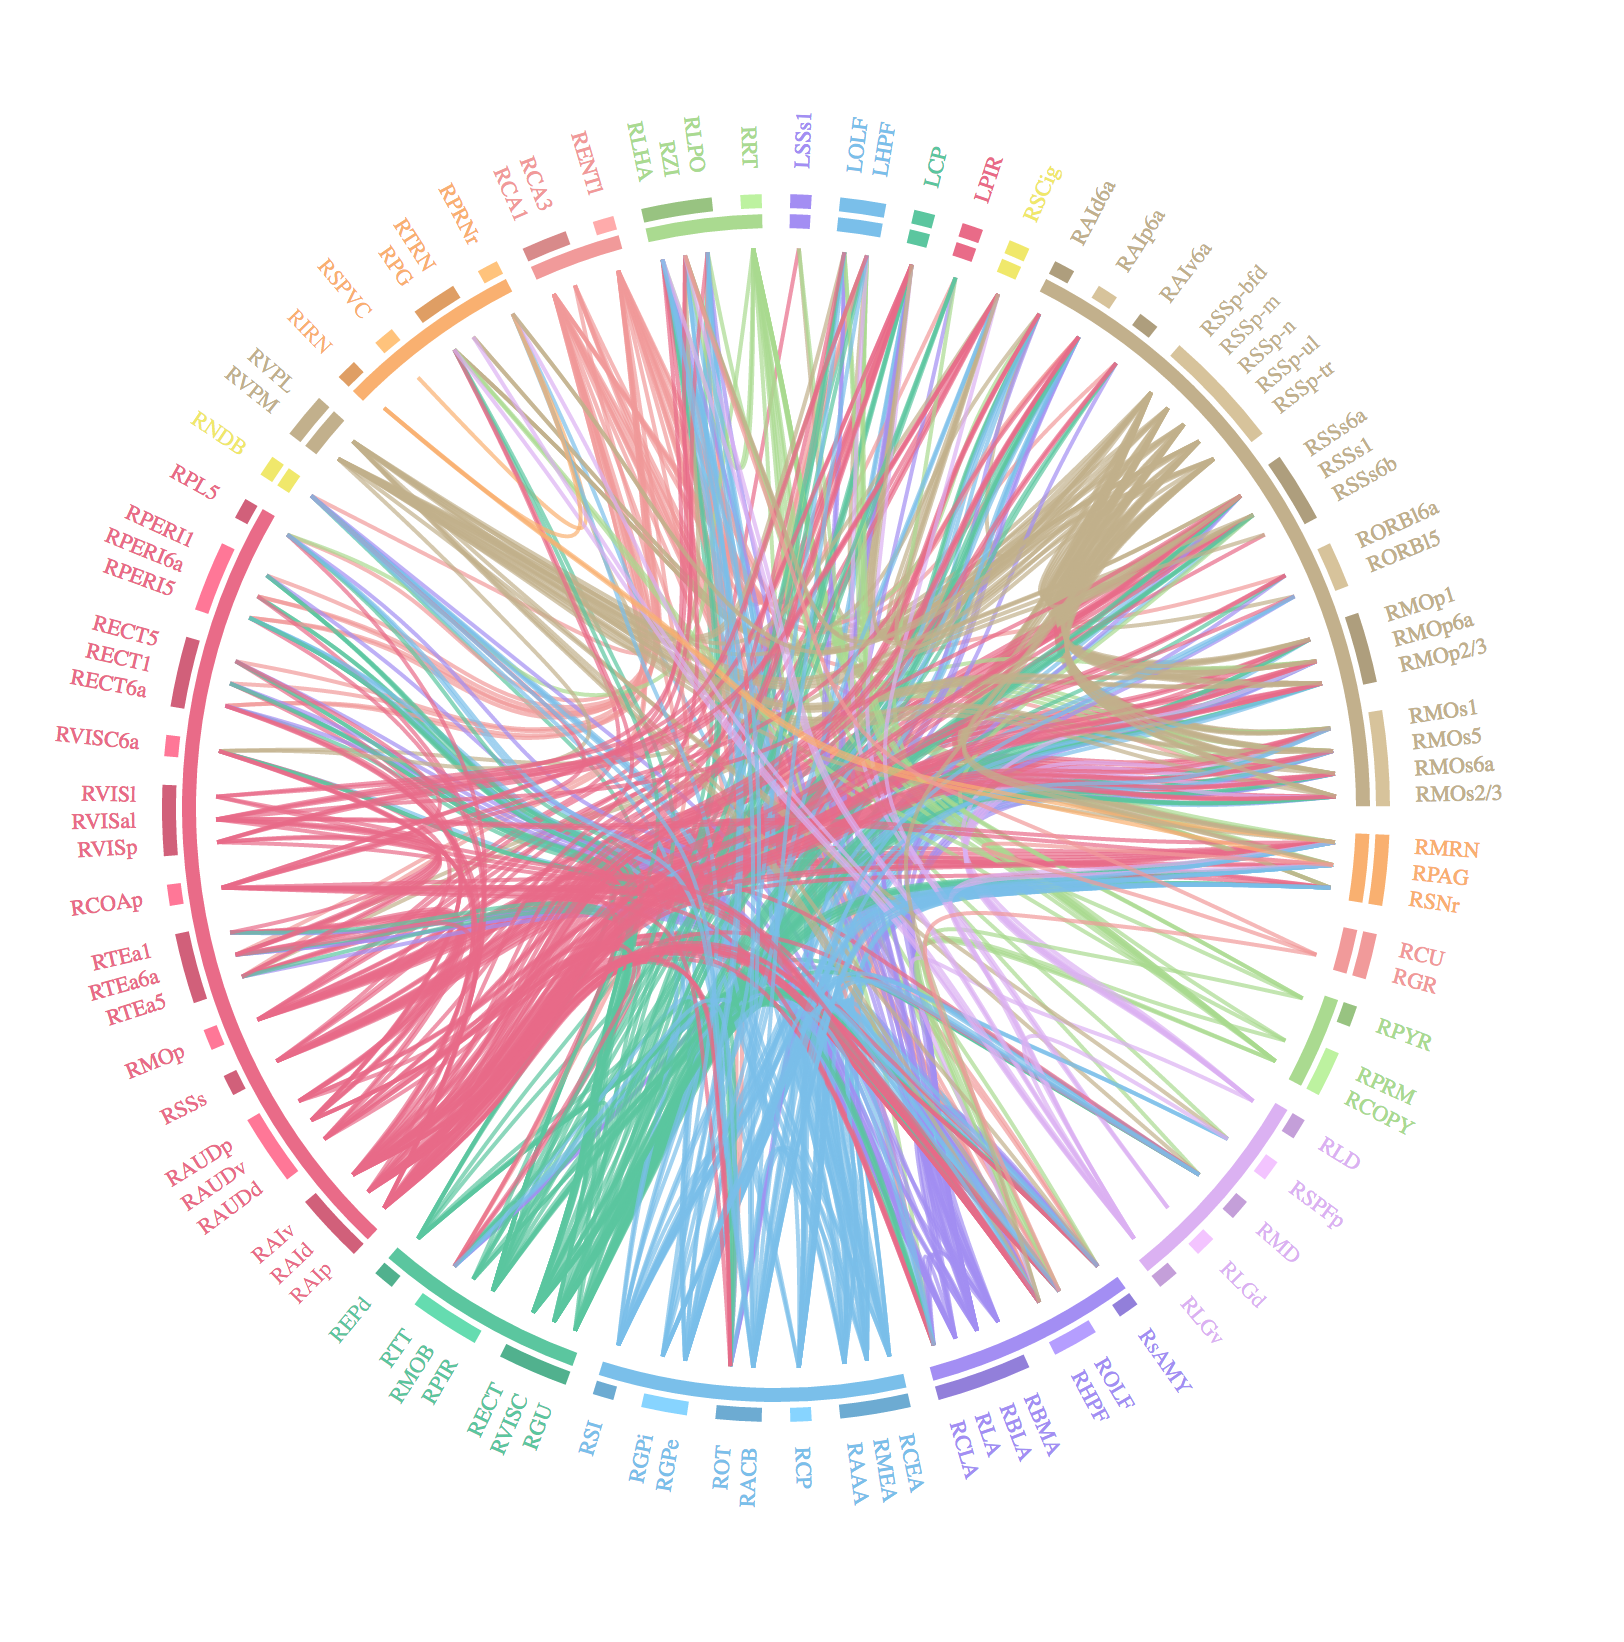

In [ ]:
display.Image("https://miracl.readthedocs.io/en/latest/_images/connectogram_grouped_by_parent_id_50_labels.png", width=800, height=800)

Density along connectivity graph:

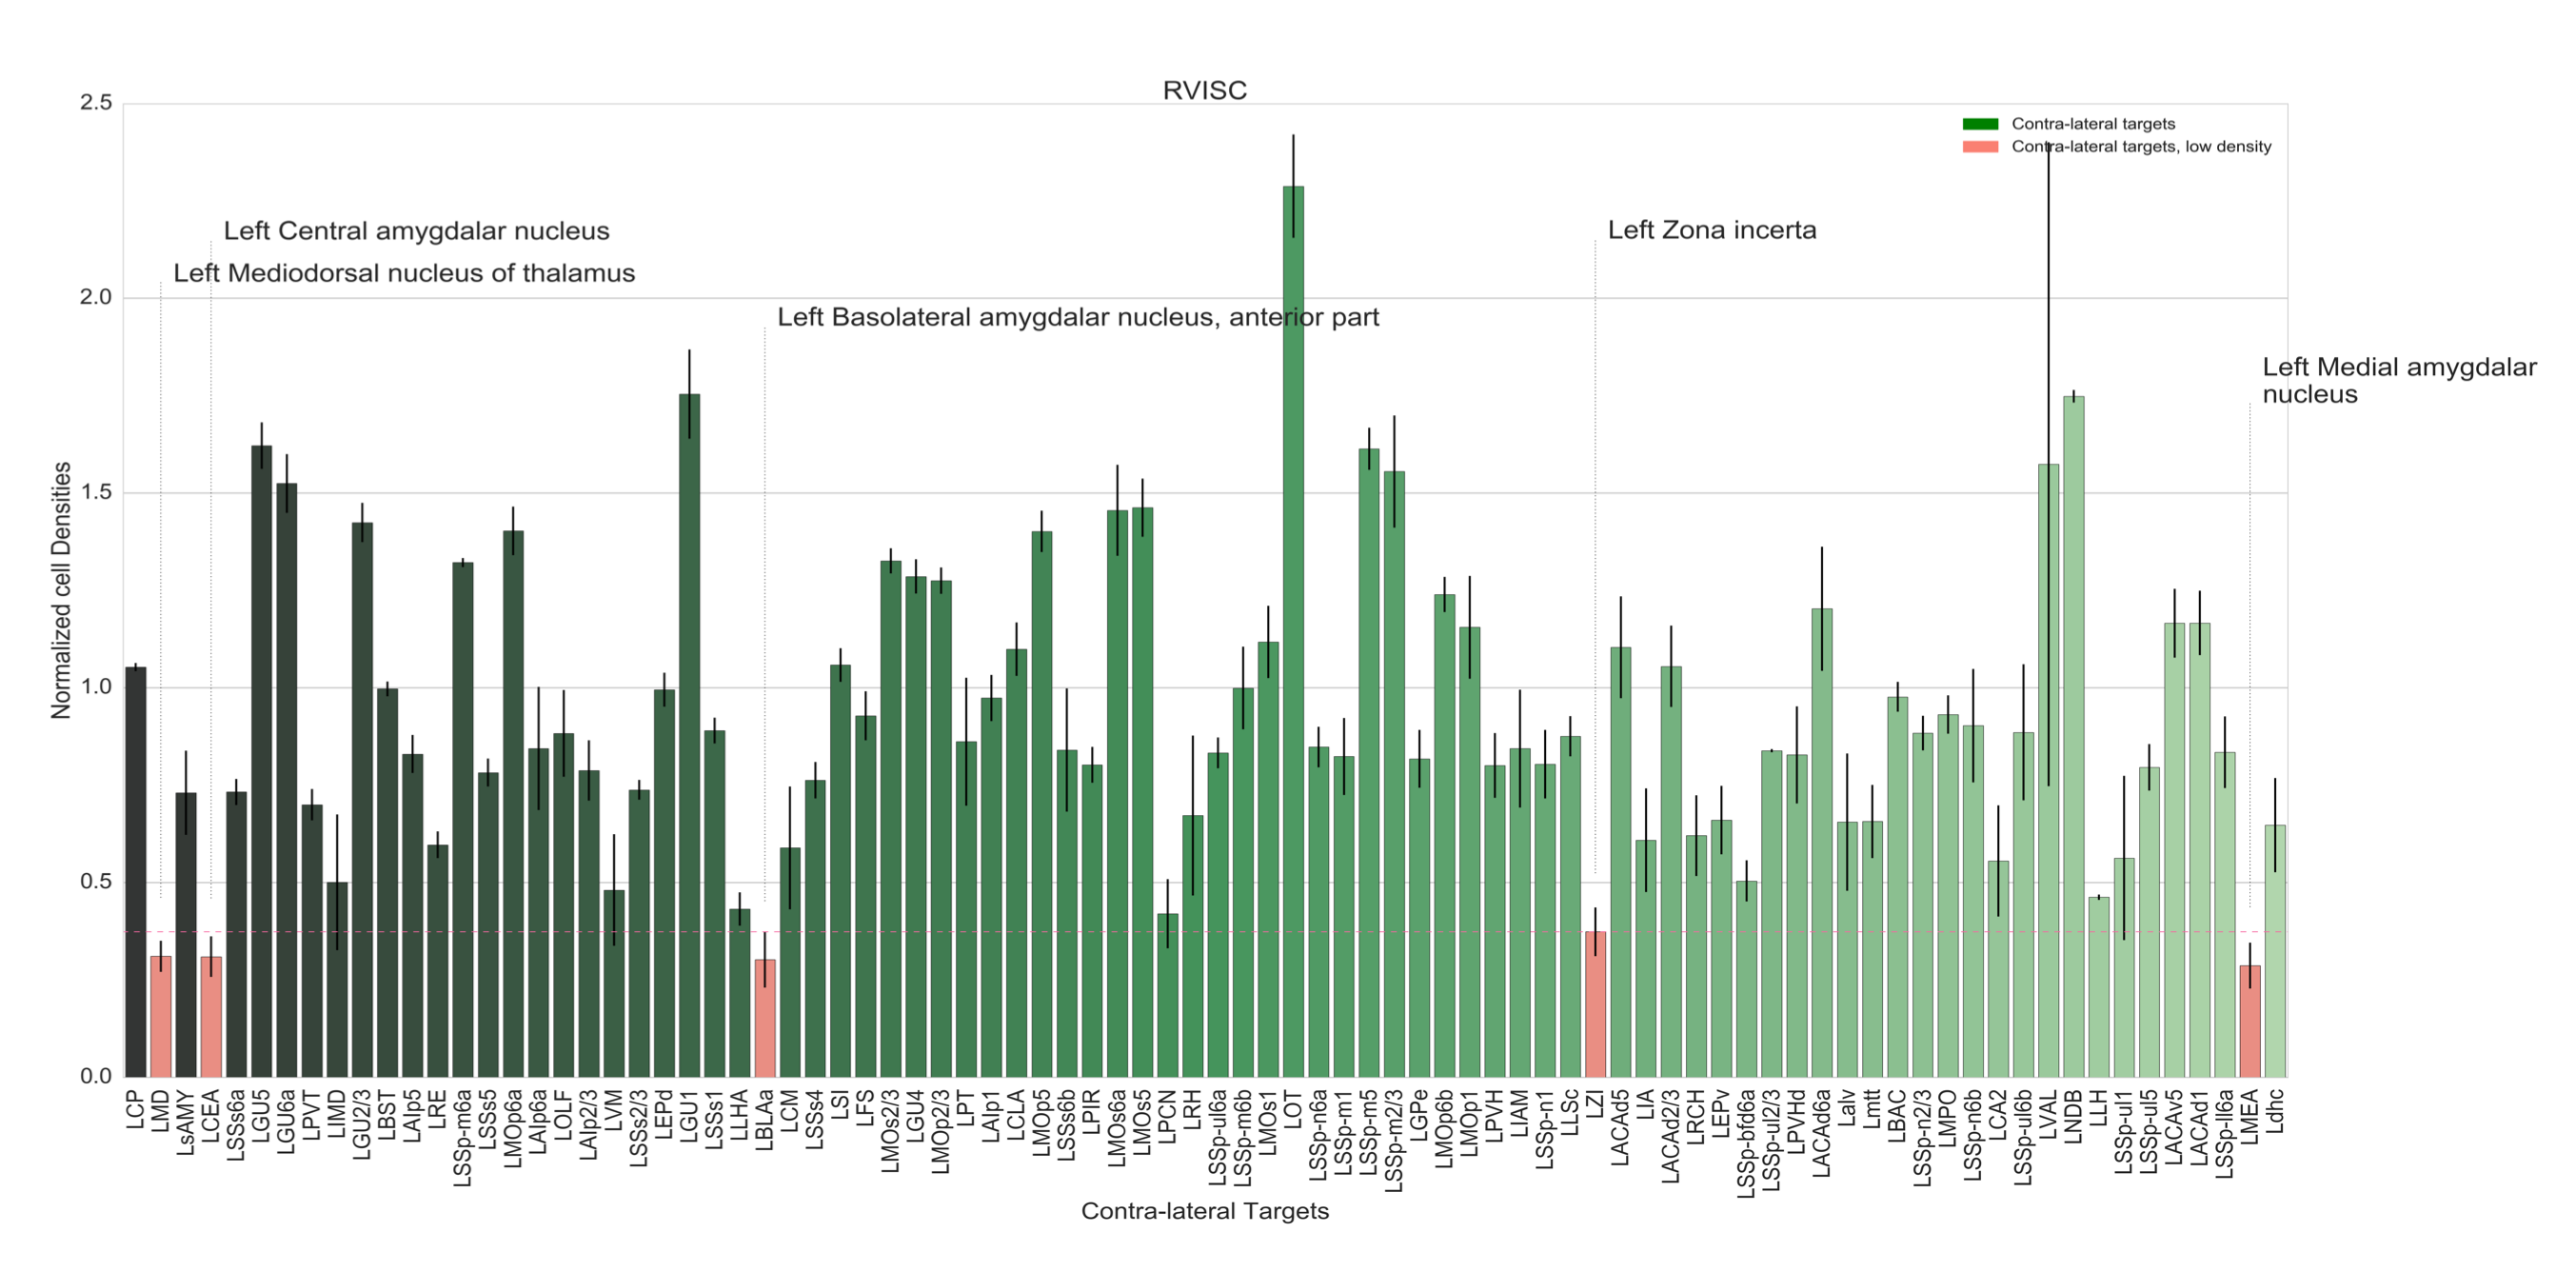

In [ ]:
display.Image("https://miracl.readthedocs.io/en/latest/_images/density_along_connectivity_graph.png", width=1000, height=500)

Figure of the number of tracts in the ROI's of the experiment created in R based on statistics (csv) created with the STA workflow:

In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1bRRHPHQ6vUBXRZYI1L0MFYgL2EdgIyQB/preview" width="900" height="450" allow="autoplay"></iframe>

P-value heatmap created as part of the STA workflow:

In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1Aqa_z2TTXyjm8l2A1s6_Civcgo9DrUQV/preview" width="800" height="600" allow="autoplay"></iframe>